In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import seaborn as sns
sns.set(style ="whitegrid", font_scale=1.5)
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
color_palette = ['#93003a', '#00429d', '#93c4d2', '#6ebf7c']

### Parsing Output

In [2]:
model_name = 'los_angeles_0808' # parameter model name used in train_model.py
data_name = 'data/los_angeles/0808/' # parameter PICKLE_PATH_FOLDER used in train_model.py

In [3]:
output = torch.load(f'../trained_models/{model_name}/simulation/generated_output.pt').cpu().numpy()
uid = torch.load(f'../trained_models/{model_name}/simulation/uid.pt').cpu().numpy()
key_table = pd.read_csv(f'../{data_name}los_angeles_dict.csv')
df = pd.DataFrame({'rank':output.reshape(-1, ), 
                   'id':np.repeat(uid, output.shape[1]), 
                   'time':np.tile(np.arange(336), output.shape[0])}, dtype=int)
df = df.merge(key_table, on=['id','rank'], how='left')[['id', 'time', 'lon_x', 'lat_x', 'rank', 'poi', 'exploration']]
df.columns = ['id', 'time', 'lon', 'lat', 'rank', 'poi', 'exploration']
df.head(15) # note that it is possible that a few NAs are present because some users do not have L_{c} (45) locations in the candidate set

,id,time,lon,lat,rank,poi,exploration
0,0,0,-118.045,34.095,1,2.0,0.0
1,0,1,-118.045,34.095,1,2.0,0.0
2,0,2,-118.045,34.095,1,2.0,0.0
3,0,3,-118.045,34.095,1,2.0,0.0
4,0,4,-118.045,34.095,1,2.0,0.0
5,0,5,-118.045,34.095,1,2.0,0.0
6,0,6,-118.045,34.095,1,2.0,0.0
7,0,7,-118.045,34.095,1,2.0,0.0
8,0,8,-118.045,34.095,1,2.0,0.0
9,0,9,-118.045,34.095,1,2.0,0.0


### Visualizing trajectories

In [4]:
index_user = 3
start_week = 0
end_week = start_week+2

user_table = key_table[key_table['id'] == int(uid[index_user])]
generated_output = output[index_user].astype(int)
generated_output = pd.DataFrame({'time_slot':np.arange(0, len(generated_output)), 'generated_output':generated_output})
result = pd.merge(generated_output, user_table, left_on='generated_output', right_on='rank', how='left')

with open(f'../{data_name}los_angeles.pkl', 'rb') as f:
    loc_np, time_np, poi_np, uid_np, exp_np, is_commuter_np, rank_dist_np, home_rank, work_rank = pickle.load(f)

raw_data = loc_np[index_user][24*7*start_week:24*7*end_week]
raw_data = pd.DataFrame({'time_slot':np.arange(0, len(raw_data)), 'raw_data':raw_data})
original = pd.merge(raw_data, user_table, left_on='raw_data', right_on='rank', how='left')

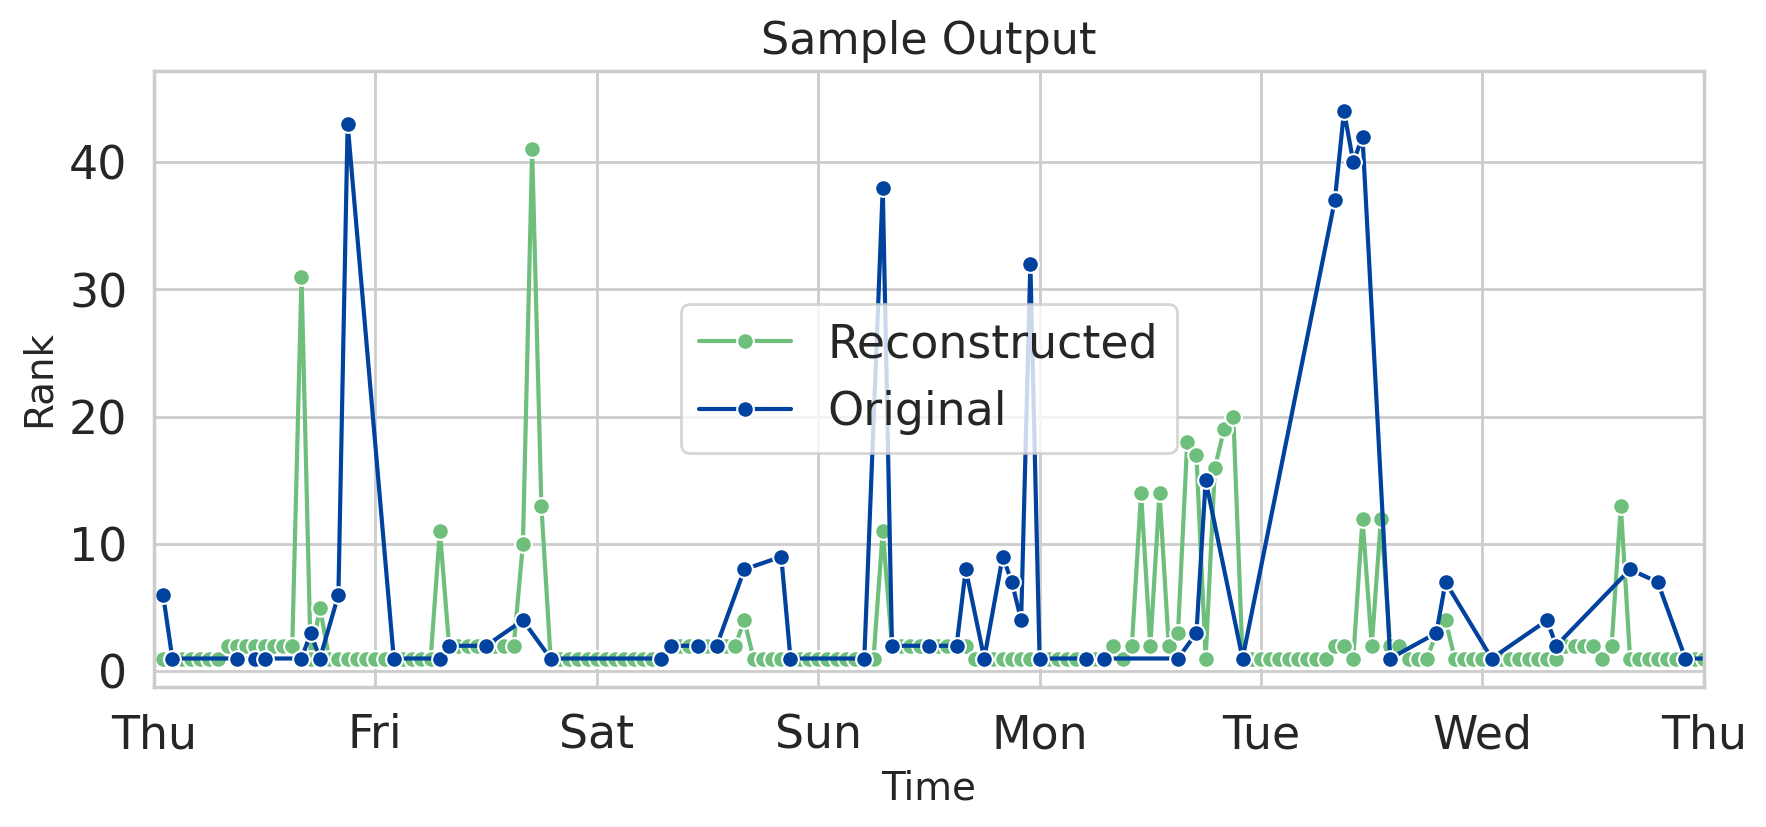

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=200)
sns.lineplot(x='time_slot', y='rank', data=result, 
             ax=ax, label='Reconstructed', marker='o', color=color_palette[3])
sns.lineplot(x='time_slot', y='rank', data=original, 
             ax=ax, label='Original', marker='o', color=color_palette[1])
ax.set(xlabel='Time', ylabel='Rank', title='Sample Output',
       xticks=np.arange(0,24*7*2,24), 
       xticklabels=['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed']*2,
       xlim=(0, 24*7*1));

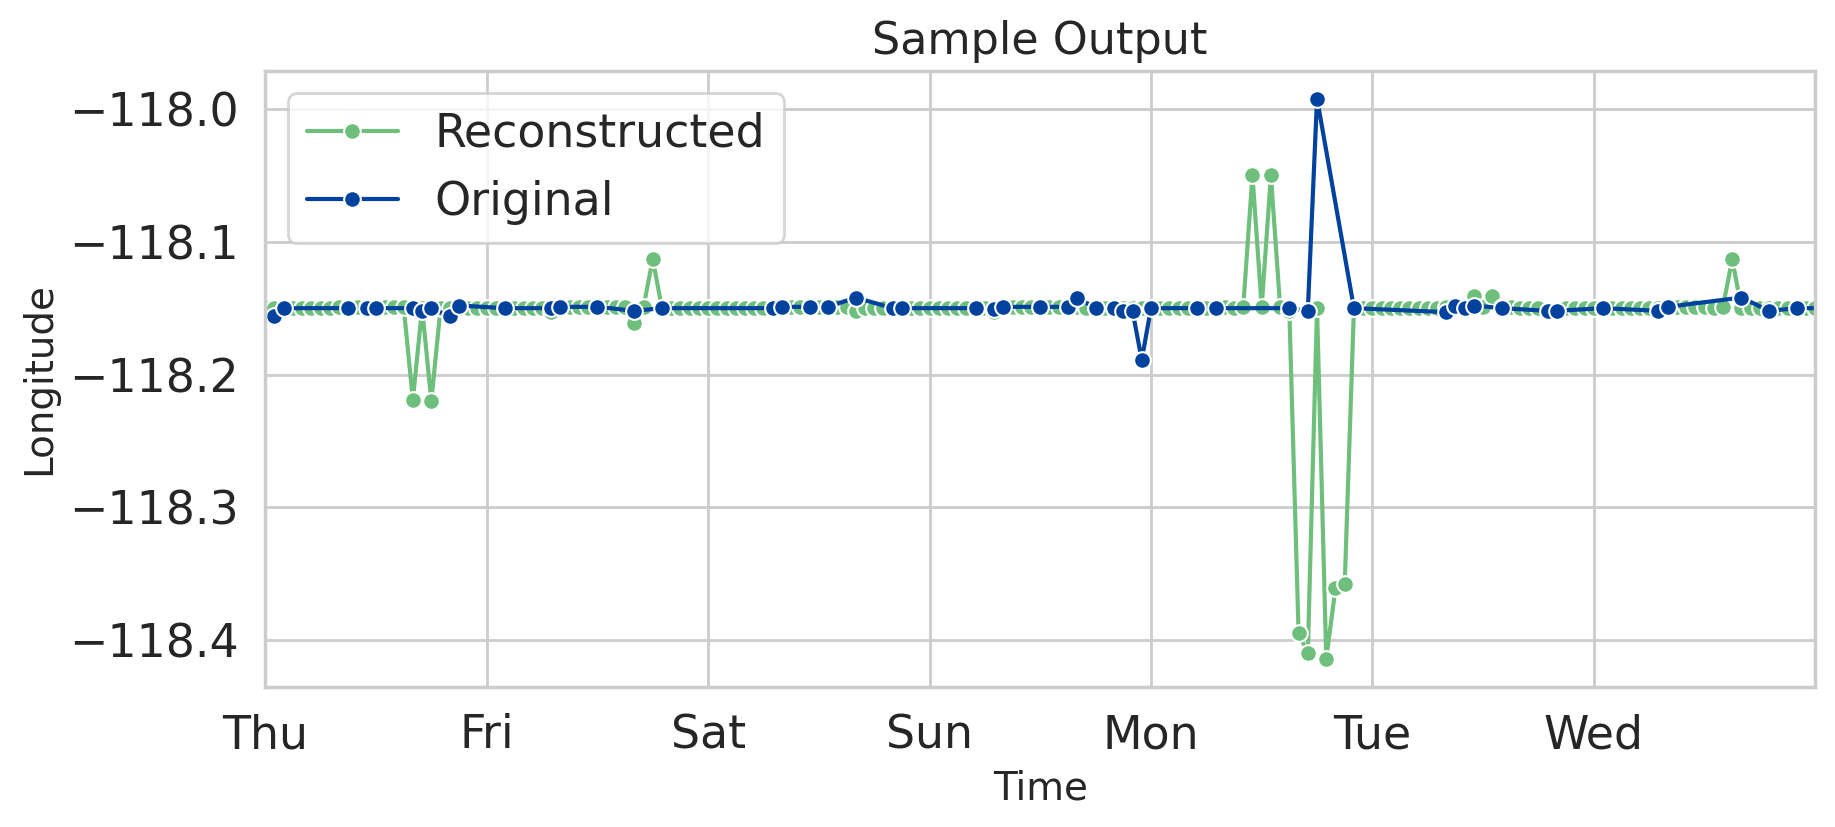

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=200)
sns.lineplot(x='time_slot', y='lon_x', data=result, 
             ax=ax, label='Reconstructed', marker='o', color=color_palette[3])
sns.lineplot(x='time_slot', y='lon_x', data=original, 
             ax=ax, label='Original', marker='o', color=color_palette[1])
ax.set(xlabel='Time', ylabel='Longitude', title='Sample Output',
       xticks=np.arange(0,24*7,24), 
       xticklabels=['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'],
       xlim=(0, 24*7));